# Setting up pandas

In [1]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd

# import the datetime library to work with dates
import datetime
from datetime import datetime, date

# Set some pandas library options that 
# configure output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# import the matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# set the starting value for the generator
# random numbers
seedval = 111111

# Creating time series graphs

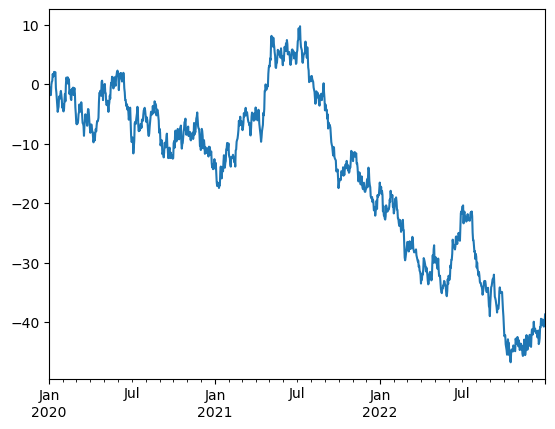

In [2]:
# generate time series for
# based on random walk
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096),
              index=pd.date_range('2020-01-01', 
                                  '2022-12-31'))
walk_ts = s.cumsum()
# this line visualizes a random walk - it's that simple :)
walk_ts.plot();

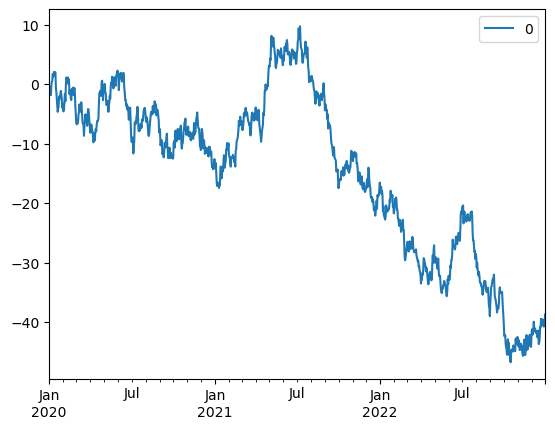

In [3]:
# Rendering a DataFrame object with one column will give 
# same result as rendering a Series object,
# only now a legend will be added
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

In [4]:
# generate two random walks that will become 
# two columns of the DataFrame object
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), 
                  index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2020-01-01 -1.878324  1.362367
2020-01-02 -2.804186  1.427261
2020-01-03 -3.241758  3.165368
2020-01-04 -2.750550  3.332685
2020-01-05 -1.620667  2.930017

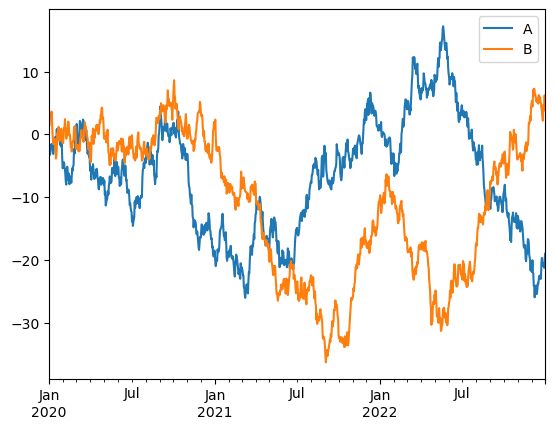

In [5]:
# visualize the dataframe data, each on the chart
# the column will be represented by a line and will also be
# added legend
walk_df.plot();

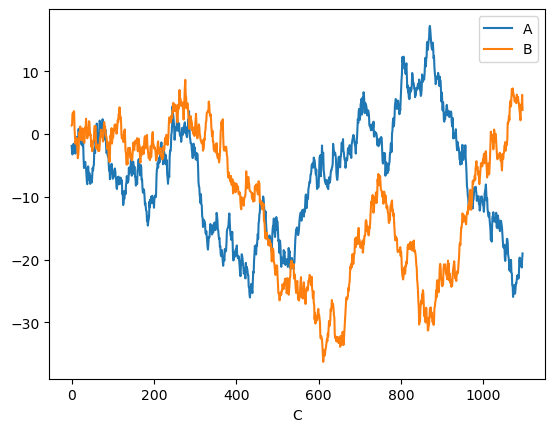

In [6]:
# create a copy of the random walk
df2 = walk_df.copy()
# add column C, which accepts
# values from 0 to 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
# use X axis labels instead of dates 
# column 'C' values, get x-axis labels in
# range from 0 to 1000
df2.plot(x='C', y=['A', 'B']);

# Adding a title and changing axis labels

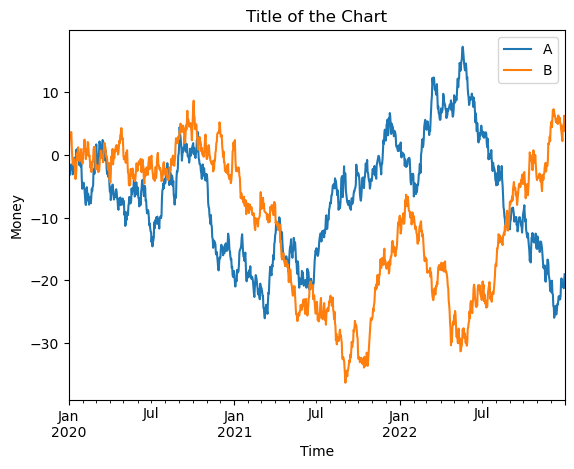

In [7]:
# create a time series graph with a title and specified 
# x and y axis labels

# set the title using the title parameter of the .plot() method
walk_df.plot(title='Title of the Chart')
# after calling the .plot() method explicitly
# set the labels of the x and y axes
plt.xlabel('Time')
plt.ylabel('Money');

# Setting the legend content and location

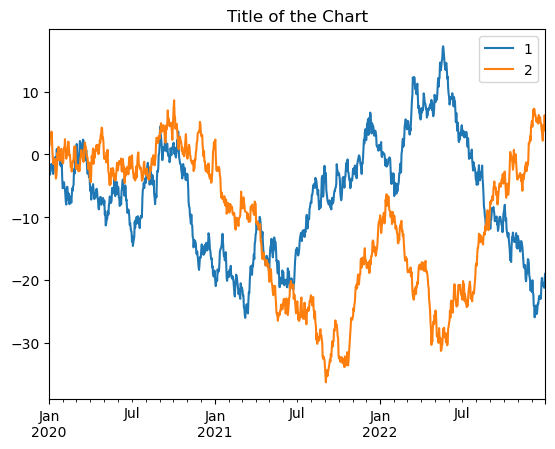

In [8]:
# change the legend elements corresponding 
# dataframe column names
ax = walk_df.plot(title='Title of the Chart')
# this line specifies the legend labels
ax.legend(['1', '2']);

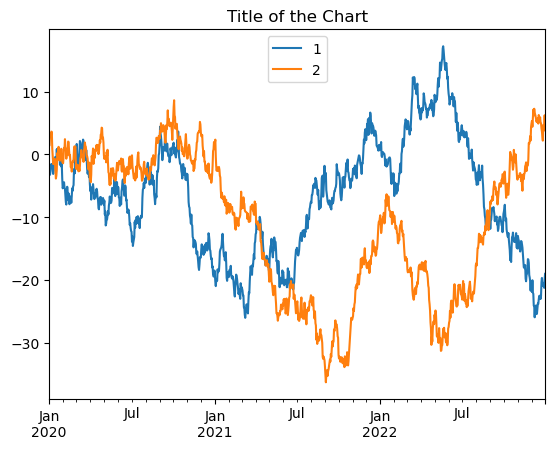

In [9]:
# change the location of the legend
ax = walk_df.plot(title='Title of the Chart')
# apply vertical top alignment to the legend 
# with horizontal center alignment
ax.legend(['1', '2'], loc='upper center');

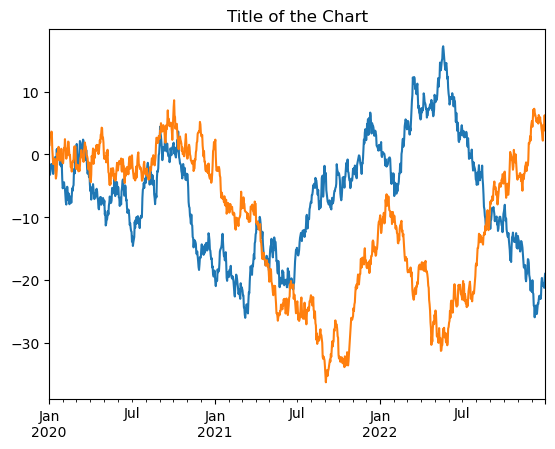

In [10]:
# disable the legend using legend=False
walk_df.plot(title='Title of the Chart', legend=False);

# Customize colors, styles, line thicknesses, and line markers

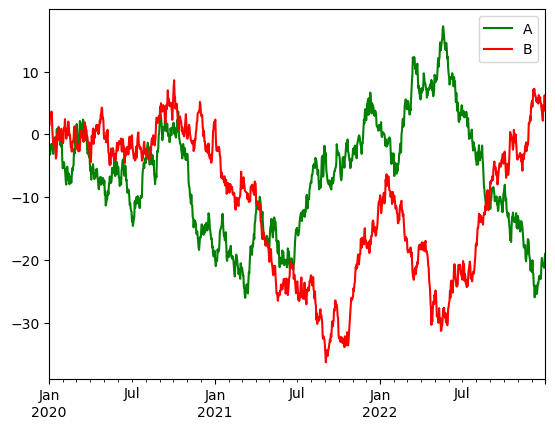

In [11]:
# change the colors of the graph lines using symbolic
# code for first line and hexadecimal
# RGB code for the second
walk_df.plot(style=['g', '#FF0000']);

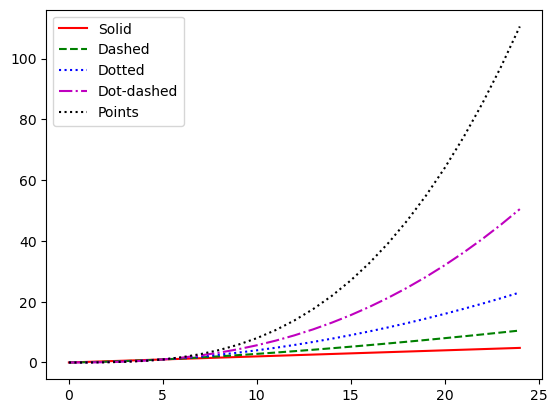

In [12]:
# demonstrate different line styles
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 
                 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0 : t,
                           1 : t**1.5,
                           2 : t**2.0,
                           3 : t**2.5,
                           4 : t**3.0})
# create a graph by setting the color and style of each line
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])
# set the legend
ax.legend(legend_labels, loc='upper left');

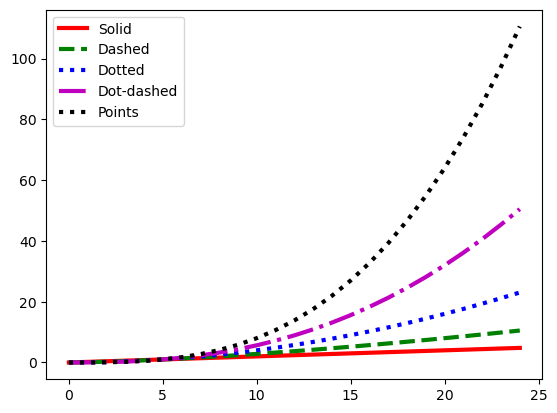

In [13]:
# we build the graph again, setting the style and color of each
# lines and thickness 3 for all lines
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left');

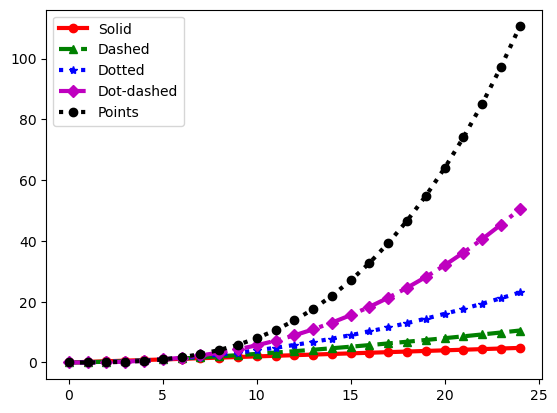

In [14]:
# draw again, adding line markers
ax = line_style.plot(style=['r-o', 'g--^', 'b:*', 
                            'm-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left');

# Setting the value of divisions and marks of scale divisions

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

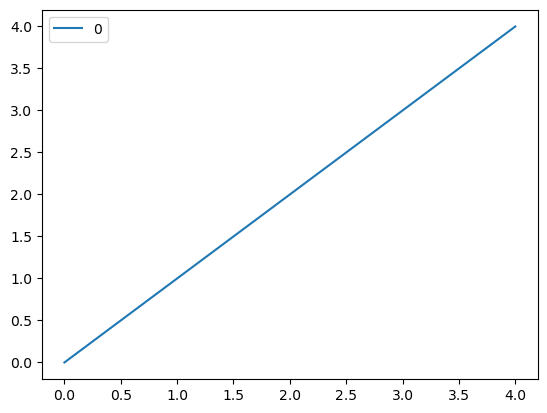

In [15]:
# build a simple graph to demonstrate
# how to extract information about scale divisions
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks

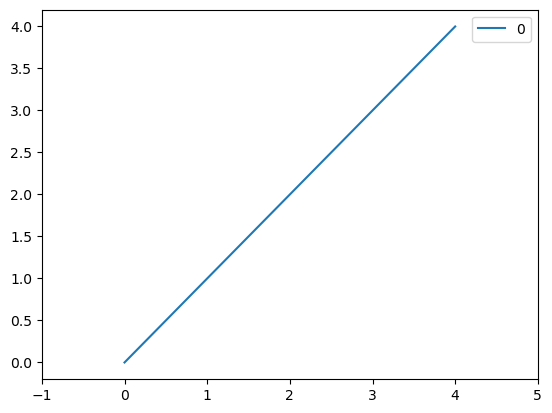

In [16]:
# re-set the x-axis range from -1 to 5 and output
# divisions only for integer values
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6));

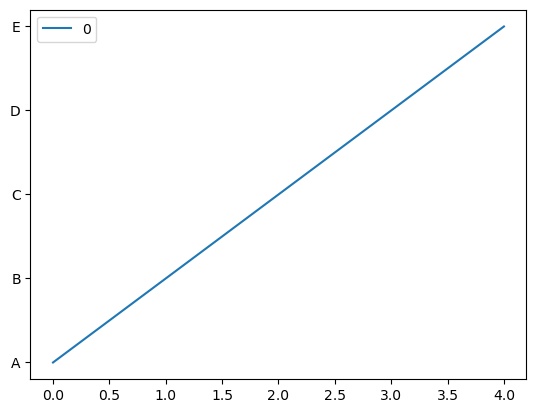

In [17]:
# rename the y-axis tick marks
# in labels A, B, C, D and E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list("ABCDE"));

# Formatting tick marks containing dates using formatters

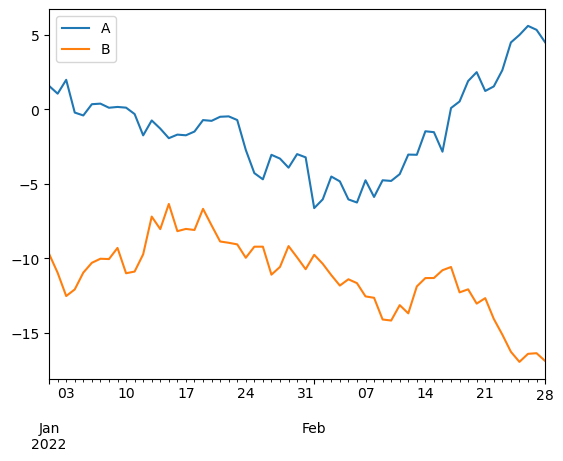

In [18]:
# visualize data for January-February 2022
# based on random walk
walk_df.loc['2022-01':'2022-02'].plot();

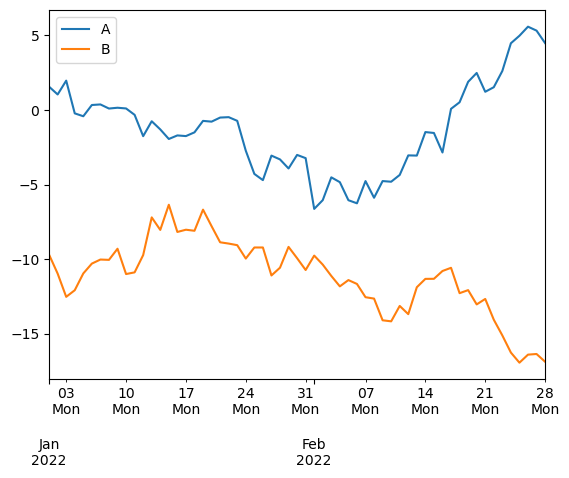

In [19]:
# import the necessary locators and formatters
from matplotlib.dates import WeekdayLocator, \
DateFormatter, MonthLocator

# visualize data for January-February 2022
ax = walk_df.loc['2022-01':'2022-02'].plot()

# set up intermediate division marks
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# set up major tick marks
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

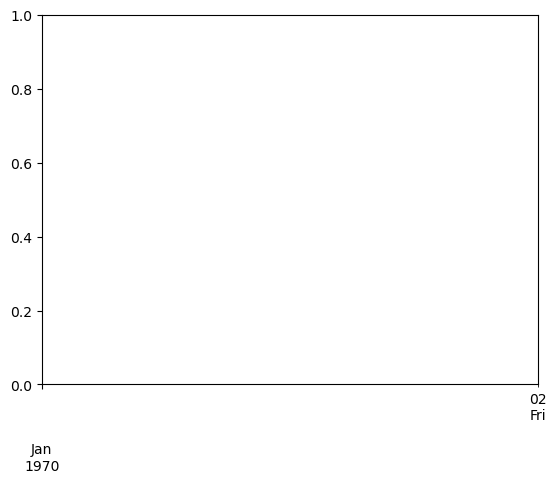

In [20]:
# create a copy of data for January-February 2022
walk_subset = walk_df['2022-01':'2022-02']

# building a graph
fig, ax = plt.subplots()

# inform matplotlib that we are using dates
# note that we need to convert
# index DatetimeIndex into a homogeneous multidimensional Numpy array,
# consisting of datetime.datetime objectsax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# set up intermediate division marks
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# set up major tick marks
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

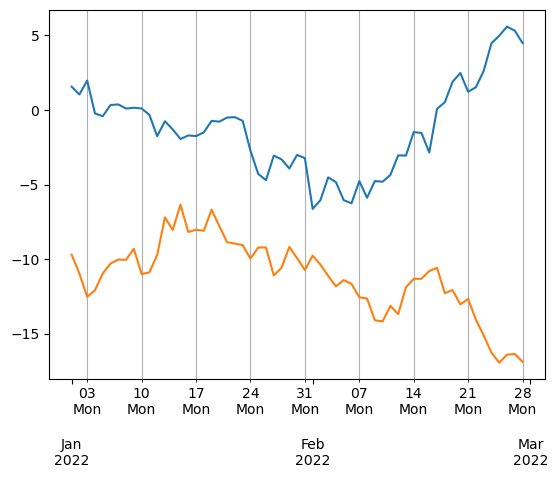

In [21]:
# building a graph
fig, ax = plt.subplots()

# inform matplotlib that we are using dates
# note that we need to convert
# index DatetimeIndex into a homogeneous multidimensional Numpy array,
# consisting of datetime.datetime objects
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# set up intermediate division marks
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True, "minor") # include grid lines for intermediate divisions
ax.xaxis.grid(False, "major") # disable grid lines for main divisions

# set up major tick marks
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

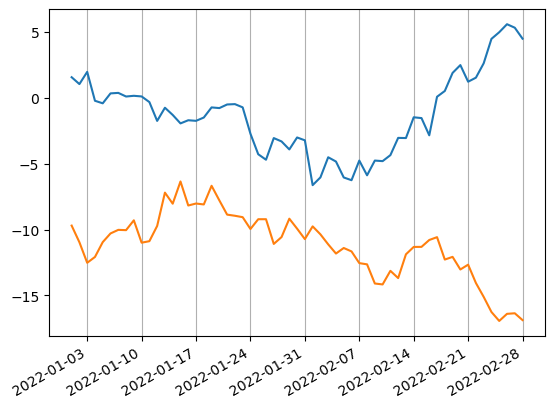

In [22]:
# building a graph
fig, ax = plt.subplots()

# inform matplotlib that we are using dates
# note that we need to convert
# index DatetimeIndex into a homogeneous multidimensional Numpy array,
# consisting of datetime.datetime objects
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

ax.xaxis.grid(True, "major") # display grid lines for main divisions

# set up major tick marks
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# rotate date labels
fig.autofmt_xdate();

# Bar charts

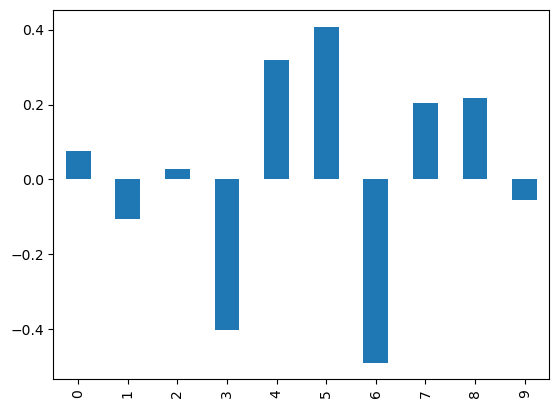

In [23]:
# generate data for the bar chart
# generate a small series consisting 
# of 10 random values
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)
# build a bar chart
s.plot(kind='bar');

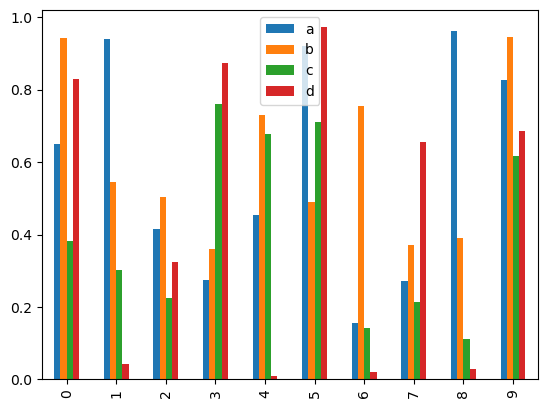

In [24]:
# generate data for the bar chart 
# based on several episodes
# generate 4 columns consisting
# of 10 random valuesnp.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# build a bar chart 
# based on several episodes
df2.plot(kind='bar');

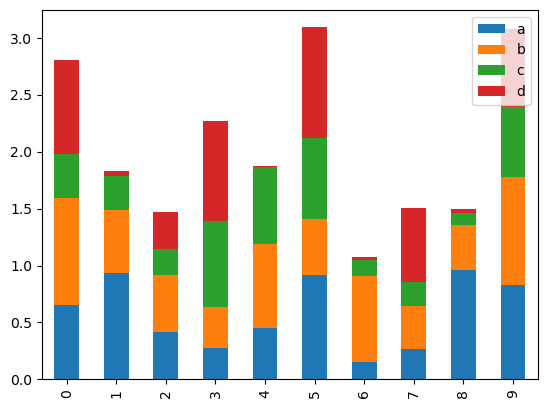

In [25]:
# vertical docked
# bar chart
df2.plot(kind='bar', stacked=True);

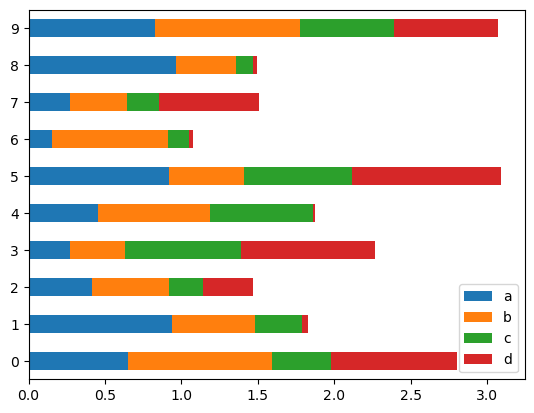

In [26]:
# horizontal docked
# bar chart
df2.plot(kind='barh', stacked=True);

# Histograms

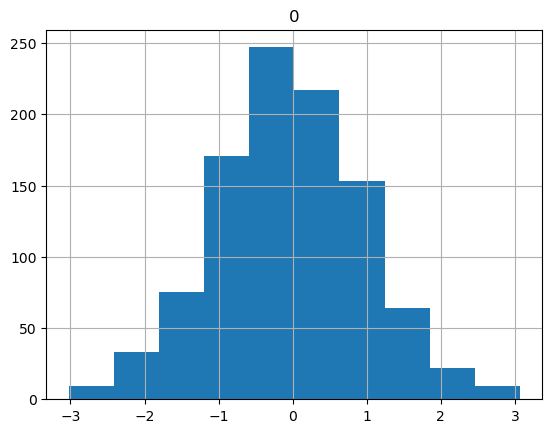

In [27]:
# generate data for the histogram
np.random.seed(seedval)
# generate 1000 random numbers
dfh = pd.DataFrame(np.random.randn(1000))
# build a histogram
dfh.hist();

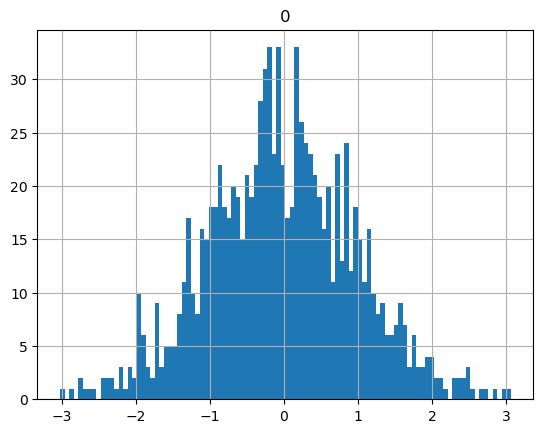

In [28]:
# build a histogram again, but now with 
# large number of intervals (bins)
dfh.hist(bins = 100);

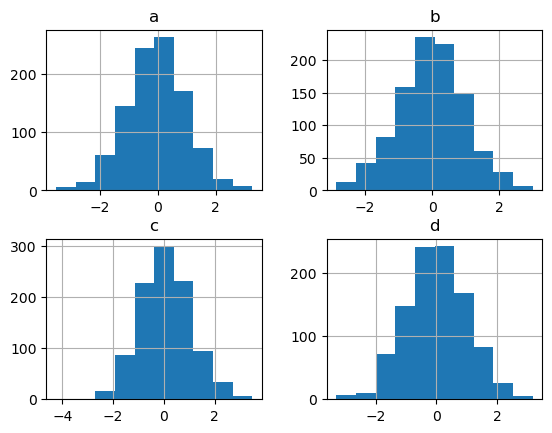

In [29]:
# generate data for the graph with
# multiple histograms
# create a dataframe with 4 columns,
# each consists of 1000 random numbers
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4), 
                   columns=['a', 'b', 'c', 'd'])
# building a graph. Since we have 4 columns,
# pandas builds four histograms
dfh.hist();

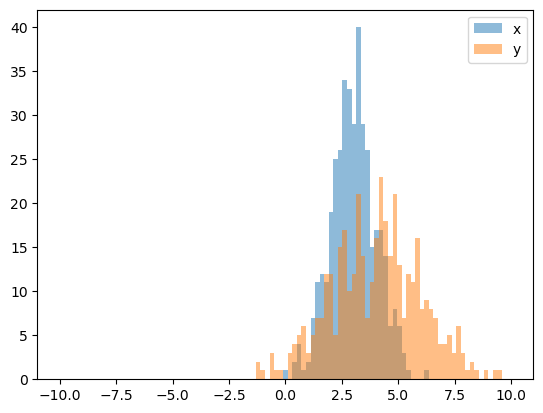

In [30]:
# use the pyplot module directly 
# to overlay multiple histograms
# generate two distributions, each with its own
# mean and standard deviationnp.random.seed(seedval)
x = [np.random.normal(3,1) for _ in range(400)]
y = [np.random.normal(4,2) for _ in range(400)]

# set intervals (range from -10 to 10 and 100 intervals)
bins = np.linspace(-10, 10, 100)

# plot x using plt.hist, 50% transparency
plt.hist(x, bins, alpha=0.5, label='x')
# plot y using plt.hist, 50% transparency
plt.hist(y, bins, alpha=0.5, label='y')
# place the legend in the upper right corner
plt.legend(loc='upper right');

# Box plots with whiskers

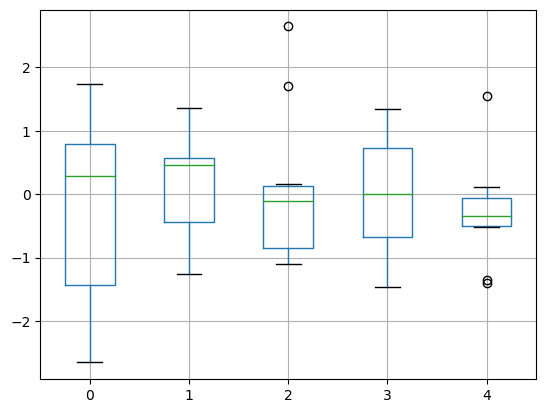

In [31]:
# generate data for the boxplot
# generate a series
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10,5))
# building a graph
dfb.boxplot(return_type='axes');

# Area charts

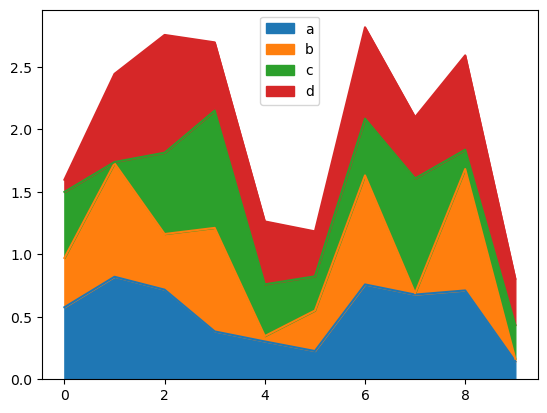

In [32]:
# generate data for the docked
# area chart
# create a dataframe with 4 columns,
# using random numbers
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# create an area chart
dfa.plot(kind='area');

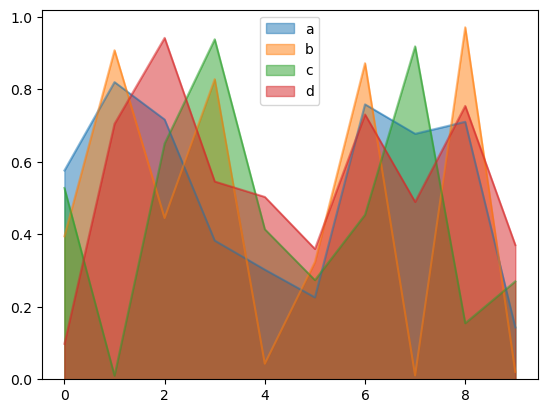

In [33]:
# build a non-joint area diagram
dfa.plot(kind='area', stacked=False);

# Scatterplots

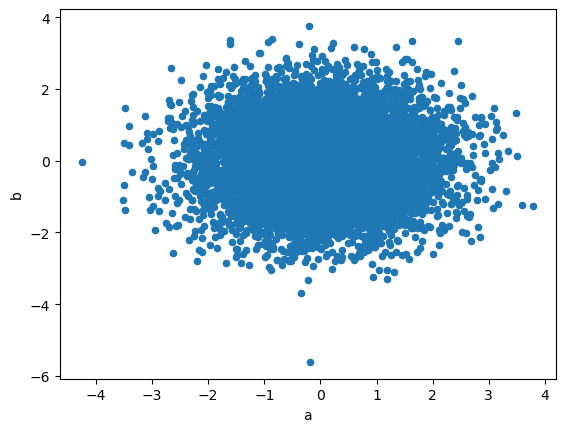

In [34]:
# create a scatterplot consisting of two series
# normally distributed random numbers
# we expect to get a cluster with center coordinates 0,0
np.random.seed(seedval)
sp_df = pd.DataFrame(np.random.randn(10000, 2), 
                     columns=['a', 'b'])
sp_df.plot(kind='scatter', x='a', y='b');

[*********************100%***********************]  1 of 1 completed


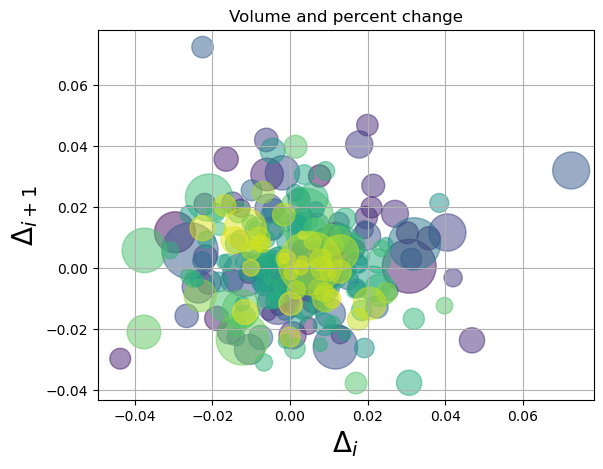

In [35]:
import yfinance as yf
# take data on Google Finance stock quotes from 1/1/2023 to 12/31/2023
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)
stock_data = yf.download("MSFT", start, end)

# % change per day
delta = np.diff(stock_data["Close"])/stock_data["Close"][:-1]

# calculate marker sizes
volume = (15 * stock_data.Volume[:-2] / stock_data.Volume[0])**2
close = 0.003 * stock_data.Close[:-2] / 0.003 * stock_data.Open[:-2]

# build a scatterplot
fig, ax = plt.subplots()
ax.scatter(delta[:-1], delta[1:], c=close, s=volume, alpha=0.5)

# add axis labels and title
ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Volume and percent change')
ax.grid(True);

# Kernel Density Estimation Plot

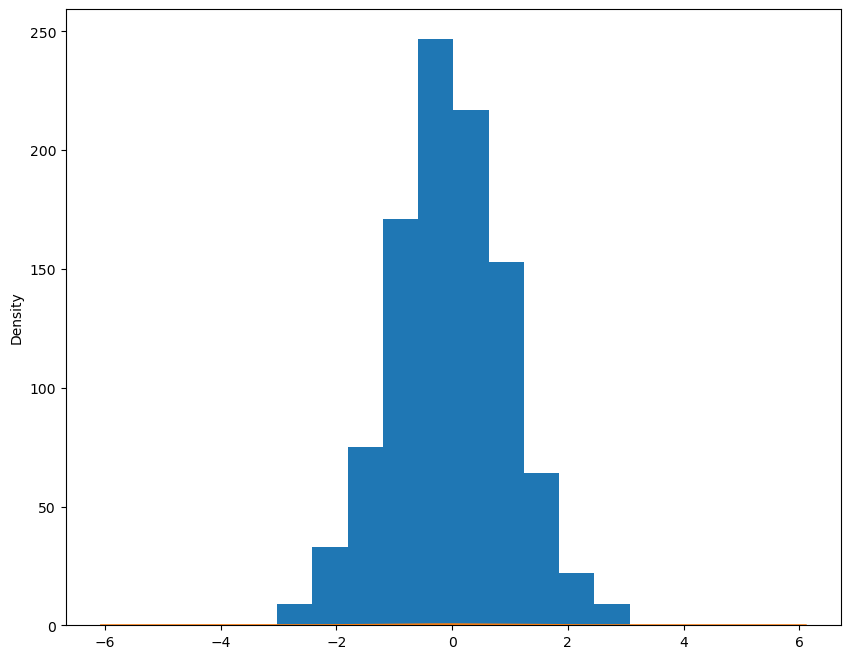

In [36]:
# create data for nuclear graph
# density estimates
# generate a series of 1000 random numbers
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))
# building a graph
s.hist() # display columns
s.plot(kind='kde', figsize=(10,8));

# Scatterplot matrix

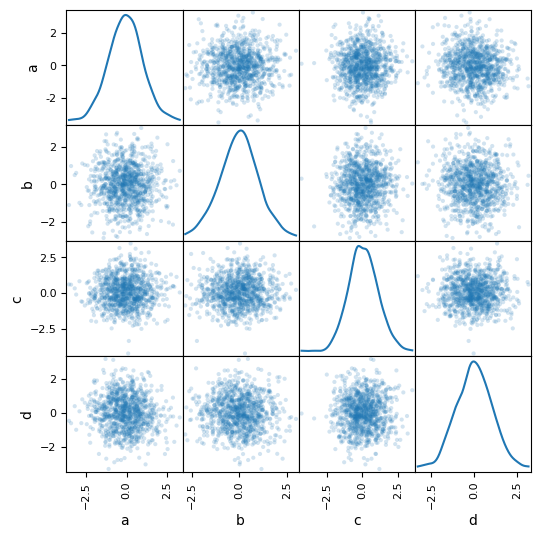

In [37]:
# create data for the matrix
# scatterplots
# import the scatter_matrix class
from pandas.plotting import scatter_matrix

# create a dataframe with 4 columns,
# each consists of 1000 random numbers
np.random.seed(seedval)
df_spm = pd.DataFrame(np.random.randn(1000, 4), 
                      columns=['a', 'b', 'c', 'd'])
# build a scatterplot matrix
scatter_matrix(df_spm, alpha=0.2, figsize=(6, 6), diagonal='kde');

# Heat map

In [38]:
# creating data for a heat map
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4],
              ['V', 'W', 'X', 'Y', 'Z'])
heatmap_data = pd.DataFrame({'A' : s + 0.0,
                             'B' : s + 0.1,
                             'C' : s + 0.2,
                             'D' : s + 0.3,
                             'E' : s + 0.4,
                             'F' : s + 0.5,
                             'G' : s + 0.6
                     })
heatmap_data

     A    B    C    D    E    F    G
V  0.0  0.1  0.2  0.3  0.4  0.5  0.6
W  0.1  0.2  0.3  0.4  0.5  0.6  0.7
X  0.2  0.3  0.4  0.5  0.6  0.7  0.8
Y  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Z  0.4  0.5  0.6  0.7  0.8  0.9  1.0

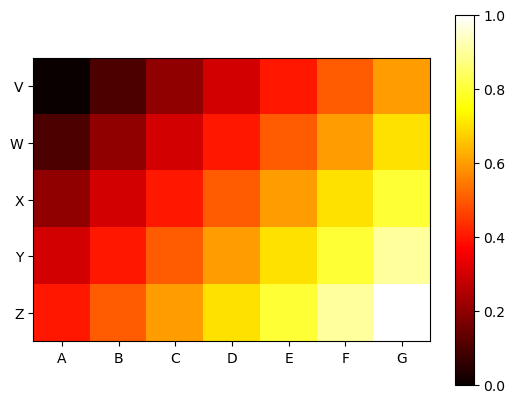

In [39]:
# building a heat map
plt.imshow(heatmap_data, cmap='hot', interpolation='none')
plt.colorbar()  # add a color intensity scale
# set labels
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index);

# Placement of several graphs in one picture

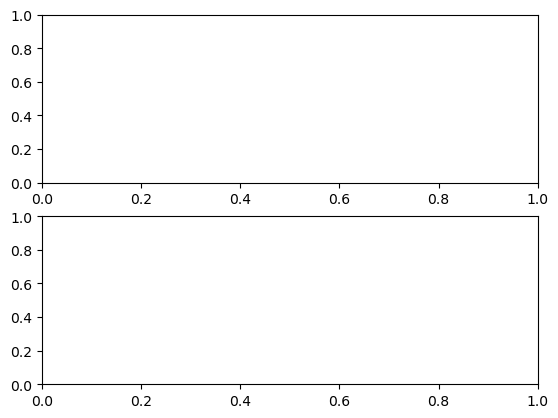

In [40]:
# create two subgraphs in one picture,
# using a 2x1 grid (2 rows and 1 column)
# ax1 - top line
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
# and ax2 - bottom line
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

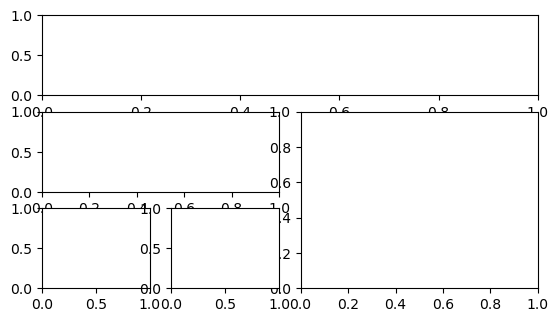

In [41]:
# create a layout with subplots using a 4x4 grid
# ax1 is located in the first row, 4 columns wide,
# all 4 columns are combined into one cell
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4)
# ax2 is located on the second line, far left and has 
# 2 columns wide, with 2 columns combined into one cell
ax2 = plt.subplot2grid((4,4), (1,0), colspan=2)
# ax3 is 2 columns wide and 2 rows high,
# in this case two columns and two rows are combined into one cell
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=2)
# ax4 is 1 row high and 1 column wide, 
# is located at line 4 and column 0, 
# concatenation of rows and columns is not specified
ax4 = plt.subplot2grid((4,4), (2,0))
# ax4 is 1 row high and 1 column wide, 
# is located on line 4 and column 1
# concatenation of rows and columns is not specified
ax5 = plt.subplot2grid((4,4), (2,1));

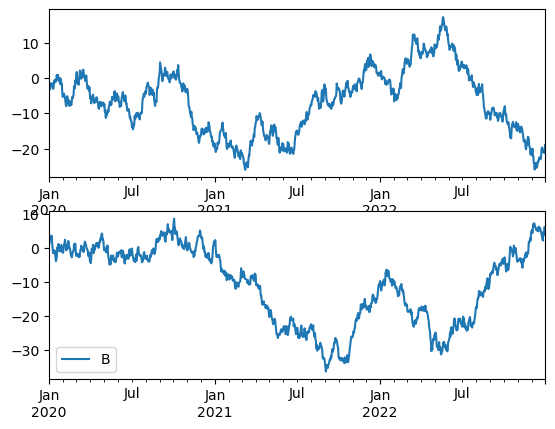

In [42]:
# demonstrate the construction of subgraphs
# create a layout using a 2x1 grid,
# each line contains one subgraph
ax5 = plt.subplot2grid((2,1), (0,0))
ax6 = plt.subplot2grid((2,1), (1,0))
# draw the first subplot based on column 0 
# dataframe walk_df in the top row of the grid
walk_df[walk_df.columns[0]].plot(ax = ax5)
# draw the second subplot based on column 1 
# dataframe walk_df in the bottom row of the grid
walk_df[[walk_df.columns[1]]].plot(ax = ax6);

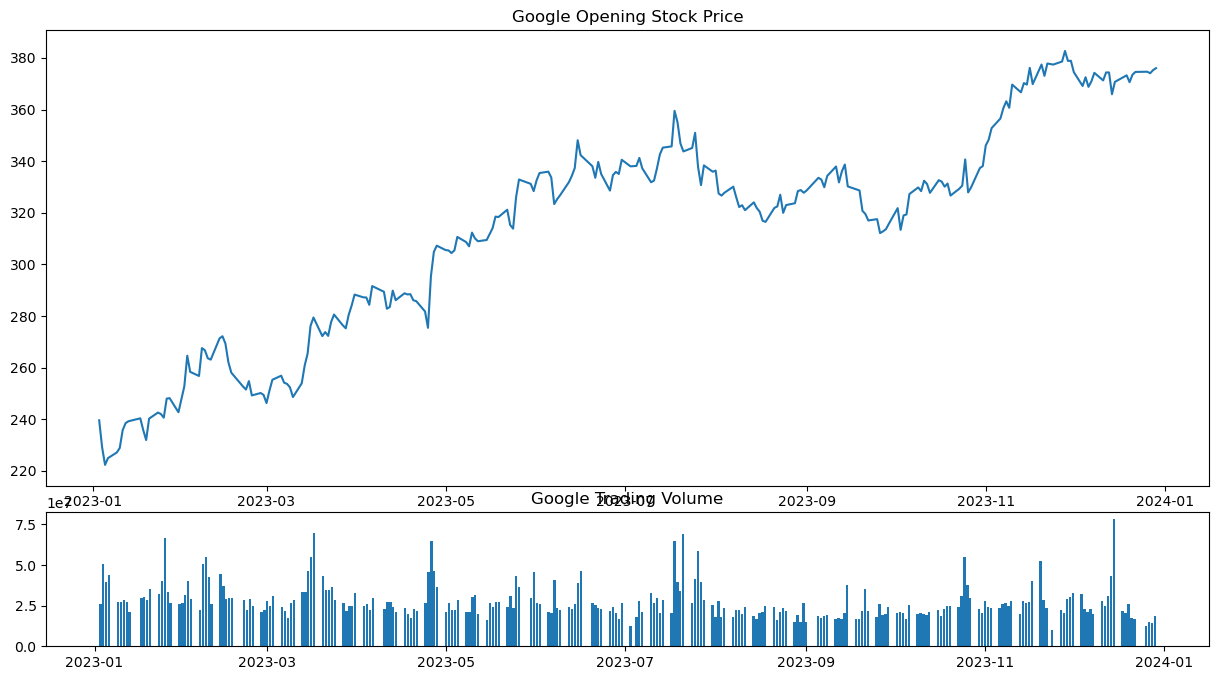

In [43]:
# build the upper subgraph - the closing price subgraph
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(stock_data.index, stock_data['Close'], label='Close')
plt.title('Google Opening Stock Price')

# build the lower subgraph - a subgraph of trading volume
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(stock_data.index, stock_data['Volume'])
plt.title('Google Trading Volume')

# set the size of the picture
plt.gcf().set_size_inches(15,8)